In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

/Users/patriziapain/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Imports 


In [2]:
pop_growth_csv = "population_growth.csv"
pop_total_csv = "population_total.csv"

pop_growth_df = pd.read_csv(pop_growth_csv)
pop_total_df = pd.read_csv(pop_total_csv)

print(pop_growth_df.head())
print(pop_total_df.head())

  Country Name Country Code                Indicator Name Indicator Code  \
0        Aruba          ABW  Population growth (annual %)    SP.POP.GROW   
1  Afghanistan          AFG  Population growth (annual %)    SP.POP.GROW   
2       Angola          AGO  Population growth (annual %)    SP.POP.GROW   
3      Albania          ALB  Population growth (annual %)    SP.POP.GROW   
4      Andorra          AND  Population growth (annual %)    SP.POP.GROW   

       1960      1961      1962      1963      1964      1965     ...       \
0  3.148037  2.238144  1.409622  0.832453  0.592649  0.573468     ...        
1  1.816077  1.876528  1.934999  1.992521  2.049423  2.105369     ...        
2  1.903517  1.927754  1.945774  1.930693  1.870296  1.788799     ...        
3  3.015423  3.120855  3.056731  2.953749  2.880686  2.754021     ...        
4  7.050663  6.941532  6.692697  6.559522  6.241511  5.998800     ...        

       2009      2010      2011      2012      2013      2014      2015  \

Turning csv into dataframes 

In [3]:
pop_growth_df = pop_growth_df.drop(columns=['Indicator Name', 'Indicator Code', "Country Code"])
pop_growth_df = pop_growth_df.drop(pop_growth_df.columns[pop_growth_df.columns.str.contains('unnamed',case = False)],axis = 1)
print(pop_growth_df.head())

pop_total_df = pop_total_df.drop(columns=['Indicator Name', 'Indicator Code', "Country Code"])
pop_total_df = pop_total_df.drop(pop_total_df.columns[pop_total_df.columns.str.contains('unnamed',case = False)],axis = 1)
print(pop_growth_df.head())

  Country Name      1960      1961      1962      1963      1964      1965  \
0        Aruba  3.148037  2.238144  1.409622  0.832453  0.592649  0.573468   
1  Afghanistan  1.816077  1.876528  1.934999  1.992521  2.049423  2.105369   
2       Angola  1.903517  1.927754  1.945774  1.930693  1.870296  1.788799   
3      Albania  3.015423  3.120855  3.056731  2.953749  2.880686  2.754021   
4      Andorra  7.050663  6.941532  6.692697  6.559522  6.241511  5.998800   

       1966      1967      1968    ...         2008      2009      2010  \
0  0.616991  0.587373  0.568530    ...     0.131311  0.098616  0.212680   
1  2.129588  2.146727  2.209331    ...     2.512574  2.569114  2.812617   
2  1.701798  1.653899  1.681743    ...     3.563448  3.566821  3.570099   
3  2.634564  2.630190  2.842511    ...    -0.767343 -0.673894 -0.496462   
4  5.750878  5.500706  5.309820    ...     1.414665  0.714106 -0.015393   

       2011      2012      2013      2014      2015      2016      2017  
0  0.3

Dropping unnecessary columns

In [4]:
avg_df = pd.DataFrame(columns=["Year", "Average Growth", "Average Total"])

for column in pop_growth_df:
    if column != 'Country Name':      
        avg_growth = pop_growth_df.loc[:,column].mean()
        avg_total = pop_total_df.loc[:, column].mean()
        avg_df = avg_df.append({'Year':int(column), 'Average Growth':avg_growth, 'Average Total':avg_total}, ignore_index=True)
        
print(avg_df.head())

     Year  Average Growth  Average Total
0  1960.0        2.326182   1.178154e+08
1  1961.0        2.226871   1.193987e+08
2  1962.0        2.274543   1.215153e+08
3  1963.0        2.342131   1.241500e+08
4  1964.0        2.288505   1.268056e+08


Making an average dataframe to plot & to train with

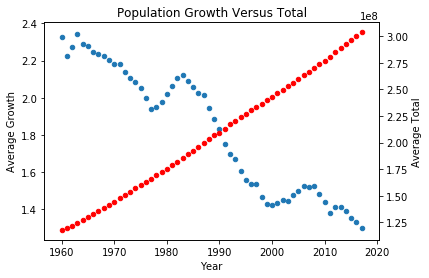

In [5]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
avg_df.plot(kind='scatter', x='Year', y='Average Growth', ax=ax, title='Population Growth Versus Total') 
avg_df.plot(kind='scatter', x='Year', y='Average Total', ax=ax2, color='r')

Plotting both population growth and total averages from the data frame to see the corelation

In [6]:
# feature
X = avg_df['Year'].values

# target
y_growth = avg_df['Average Growth'].values
y_total = avg_df['Average Total'].values

# splitting the data into train and test sets for GROWTH
X_train, X_test, y_train_growth, y_test_growth = train_test_split(X, y_growth)

# instantiate the linear models
linreg_growth = LinearRegression()
linreg_total = LinearRegression()

# fit the model for growth predictions
linreg_growth.fit(X_train.reshape(-1, 1), y_train_growth.reshape(-1, 1))
y_pred_growth = linreg_growth.predict(X_test.reshape(-1,1))

print("Growth Intercept: " + str(linreg_growth.intercept_))
print("Growth Coefficient: " + str(linreg_growth.coef_))
print("Growth predictions on test set: ")
print(y_pred_growth)

# splitting the data into train and test sets for TOTAL
X_train, X_test, y_train_total, y_test_total = train_test_split(X, y_total)

# fit the model for total predictions 
linreg_total.fit(X_train.reshape(-1,1), y_train_total.reshape(-1, 1))
y_pred_total = linreg_total.predict(X_test.reshape(-1, 1))

print("Total Intercept: " + str(linreg_total.intercept_))
print("Total Coefficient: " + str(linreg_total.coef_))
print("Total predictions on test set: ")
print(y_pred_total)

Growth Intercept: [39.57337024]
Growth Coefficient: [[-0.0189952]]
Growth predictions on test set: 
[[1.82991583]
 [1.27905514]
 [2.20981975]
 [1.90589661]
 [2.24781014]
 [1.88690142]
 [1.84891102]
 [1.81092063]
 [1.31704554]
 [2.07685338]
 [2.05785818]
 [1.69694946]
 [2.19082455]
 [1.56398308]
 [2.17182936]]
Total Intercept: [-6.35653684e+09]
Total Coefficient: [[3300245.74431547]]
Total predictions on test set: 
[[2.30753665e+08]
 [2.17552682e+08]
 [1.97751207e+08]
 [2.01051453e+08]
 [2.67056368e+08]
 [1.68048996e+08]
 [2.83557597e+08]
 [1.71349242e+08]
 [1.87850470e+08]
 [1.64748750e+08]
 [1.48247521e+08]
 [2.80257351e+08]
 [1.35046538e+08]
 [1.44947276e+08]
 [1.28446047e+08]]


Here, I fit the model and printed out the predicted values. This is fairly simple considering we only have one feature

In [7]:
print("Growth MSE: " + str(mean_squared_error(y_test_growth, y_pred_growth)))
print("Growth r2 score: " + str(r2_score(y_test_growth, y_pred_growth)))

print("Total MSE: " + str(mean_squared_error(y_test_total, y_pred_total)))
print("Total r2 score: " + str(r2_score(y_test_total, y_pred_total)))

Growth MSE: 0.013963261257339253
Growth r2 score: 0.8599643265100232
Total MSE: 1975104103677.2488
Total r2 score: 0.9992142066480998


Calculating MSE and correlation using r2. For the amount of data that we have, and the fact that there is only one feature, we believe that the MSE and r2_score indicate that the model is good to predict new data values. 

In [8]:
future_years = np.asarray(list(range(2018, 2101)))

new_pred_growth = linreg_growth.predict(future_years.reshape(-1,1))
new_pred_total = linreg_total.predict(future_years.reshape(-1, 1))

print('New predictions for growth average: ')
print(new_pred_growth)

print('New predictions for total average: ')
print(new_pred_total)

New predictions for growth average: 
[[ 1.24106475]
 [ 1.22206956]
 [ 1.20307436]
 [ 1.18407916]
 [ 1.16508397]
 [ 1.14608877]
 [ 1.12709358]
 [ 1.10809838]
 [ 1.08910318]
 [ 1.07010799]
 [ 1.05111279]
 [ 1.0321176 ]
 [ 1.0131224 ]
 [ 0.99412721]
 [ 0.97513201]
 [ 0.95613681]
 [ 0.93714162]
 [ 0.91814642]
 [ 0.89915123]
 [ 0.88015603]
 [ 0.86116083]
 [ 0.84216564]
 [ 0.82317044]
 [ 0.80417525]
 [ 0.78518005]
 [ 0.76618485]
 [ 0.74718966]
 [ 0.72819446]
 [ 0.70919927]
 [ 0.69020407]
 [ 0.67120887]
 [ 0.65221368]
 [ 0.63321848]
 [ 0.61422329]
 [ 0.59522809]
 [ 0.57623289]
 [ 0.5572377 ]
 [ 0.5382425 ]
 [ 0.51924731]
 [ 0.50025211]
 [ 0.48125691]
 [ 0.46226172]
 [ 0.44326652]
 [ 0.42427133]
 [ 0.40527613]
 [ 0.38628093]
 [ 0.36728574]
 [ 0.34829054]
 [ 0.32929535]
 [ 0.31030015]
 [ 0.29130495]
 [ 0.27230976]
 [ 0.25331456]
 [ 0.23431937]
 [ 0.21532417]
 [ 0.19632897]
 [ 0.17733378]
 [ 0.15833858]
 [ 0.13934339]
 [ 0.12034819]
 [ 0.10135299]
 [ 0.0823578 ]
 [ 0.0633626 ]
 [ 0.04436741]
 [ 

Making predictions on future years 

In [9]:
avg_pred_df = pd.DataFrame(columns=["Year", "Average Growth", "Average Total"])

avg_pred_df['Year'] = future_years
avg_pred_df['Average Growth'] = new_pred_growth
avg_pred_df['Average Total'] = new_pred_total

print(avg_pred_df.head())

   Year  Average Growth  Average Total
0  2018        1.241065   3.033591e+08
1  2019        1.222070   3.066593e+08
2  2020        1.203074   3.099596e+08
3  2021        1.184079   3.132598e+08
4  2022        1.165084   3.165601e+08


Predicting population growth and total for years 2018-2100 and storing it in a dataframe.

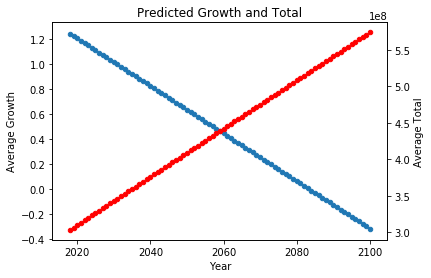

In [10]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
avg_pred_df.plot(kind='scatter', x='Year', y='Average Growth', ax=ax, title='Predicted Growth and Total') 
avg_pred_df.plot(kind='scatter', x='Year', y='Average Total', ax=ax2, color='r')

In [11]:
avg_df = avg_df.append(avg_pred_df, ignore_index=True)
print(avg_df.head())

     Year  Average Growth  Average Total
0  1960.0        2.326182   1.178154e+08
1  1961.0        2.226871   1.193987e+08
2  1962.0        2.274543   1.215153e+08
3  1963.0        2.342131   1.241500e+08
4  1964.0        2.288505   1.268056e+08


Merging the actual data versus the predicted data to create the final plot 

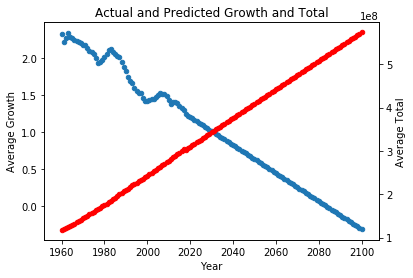

In [12]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
avg_df.plot(kind='scatter', x='Year', y='Average Growth', ax=ax, title='Actual and Predicted Growth and Total') 
avg_df.plot(kind='scatter', x='Year', y='Average Total', ax=ax2, color='r')

Plot including both the actual data and the predicted data. Should note that predicted data is linear, so it is not the best estimate, but it gives us a very good visual relationship of what will happen in the future.

In [25]:
# feature
X = avg_df['Year'].values

# target
y_growth = avg_df['Average Growth'].values
y_total = avg_df['Average Total'].values

# splitting the data into train and test sets for GROWTH
X_train, X_test, y_train_growth, y_test_growth = train_test_split(X, y_growth)

# instantiate the linear models
logreg_growth = LogisticRegression()
logreg_total = LogisticRegression()

X_train = X_train.reshape(-1,1)
y_test_growth = y_test_growth.reshape(-1,1)

# fit the model for growth predictions
logreg_growth.fit(X_train, y_test_growth)
y_pred_growth = logreg_growth.predict(X_test.reshape(-1,1))

print("Growth Intercept: " + str(logreg_growth.intercept_))
print("Growth Coefficient: " + str(logreg_growth.coef_))
print("Growth predictions on test set: ")
print(y_pred_growth)

# splitting the data into train and test sets for TOTAL
X_train, X_test, y_train_total, y_test_total = train_test_split(X, y_total)

# fit the model for total predictions 
logreg_total.fit(X_train.reshape(-1,1), y_train_total.reshape(-1, 1))
y_pred_total = logreg_total.predict(X_test.reshape(-1, 1))

print("Total Intercept: " + str(logreg_total.intercept_))
print("Total Coefficient: " + str(logreg_total.coef_))
print("Total predictions on test set: ")
print(y_pred_total)

/Users/patriziapain/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [105, 36]